<a href="https://colab.research.google.com/github/mangnez/Android-Development-Projects/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/MaunaLoaDailyTemps.csv' ,index_col='DATE', parse_dates=True) # make DATE as the index col, parse_dates so that the col is treates as "date" datatype and not "strings"
df = df.dropna() #remove missing values
print("Shape of data",df.shape)
df.head()
df

Shape of data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


<Axes: xlabel='DATE'>

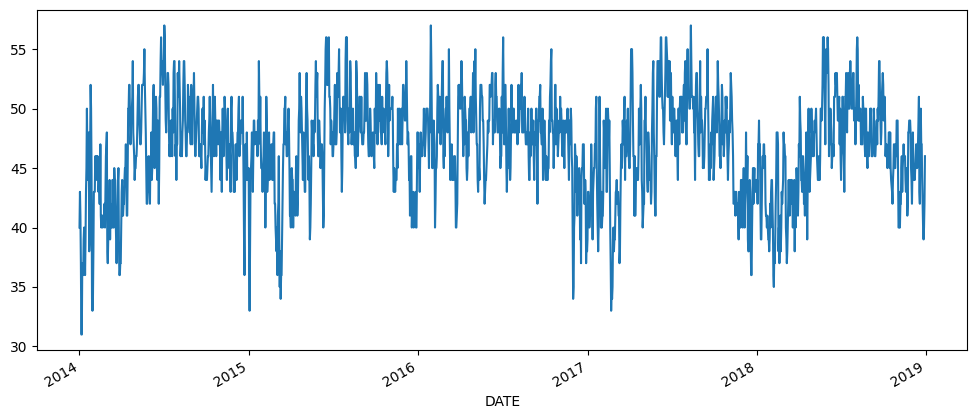

In [ ]:
df['AvgTemp'].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest = adfuller(dataset,autolag='AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression:", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
    print("\t",key, ": ", val)
ad_test(df['AvgTemp'])

1. ADF :  -6.554680125068777
2. P-Value :  8.675937480199653e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


In [ ]:
from pmdarima import auto_arima
model = auto_arima(df['AvgTemp'], trace=True, suppress_warnings=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.735, Time=15.90 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.35 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=1.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=6.65 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.85 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.311, Time=3.89 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.337, Time=7.08 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=8.23 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.577, Time=7.36 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.293, Time=4.83 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.620, Time=8.16 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8306.228, Time=5.12 sec
 ARIMA(1,0,4)(0,0,0)[0] interc

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.517
Date:                Tue, 06 Aug 2024   AIC                           8295.034
Time:                        13:28:20   BIC                           8339.092
Sample:                             0   HQIC                          8311.288
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2070      0.362      3.335      0.001       0.498       1.916
ar.L1          0.9739      0.008    124.621      0.000       0.959       0.989
ma.L1         -0.1246      0.024     -5.256      0.000      -0.171      -0.078
ma.L2         -0.2196      0.024     -9.115      0.000      -0.267      -0.172
ma.L3         -0.2056      0.024     -8.615      0.000      -0.252      -0.159
ma.L4         -0.1373      0.023     -6.034      0.000      -0.182      -0.093
ma.L5         -0.0476      0.024     -1.952      0.051      -0.095       0.000
sigma2         5.4981      0.172     31.952      0.000       5.161       5.835
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.20
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1821, 5)
(1791, 5) (30, 5)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Tue, 06 Aug 2024   AIC                           8156.395
Time:                        13:39:33   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='DATE'>

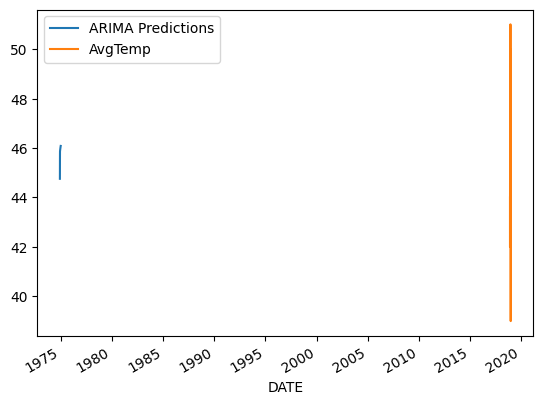

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred = model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

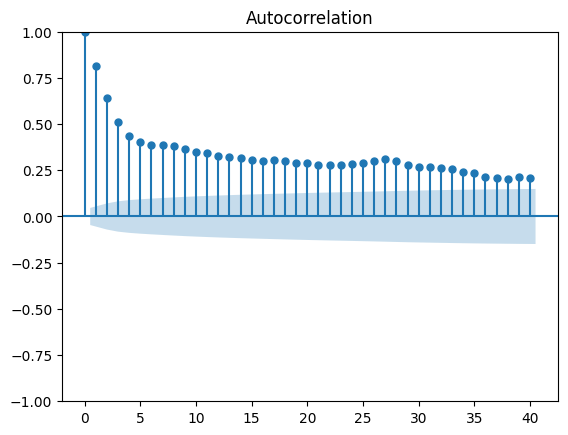

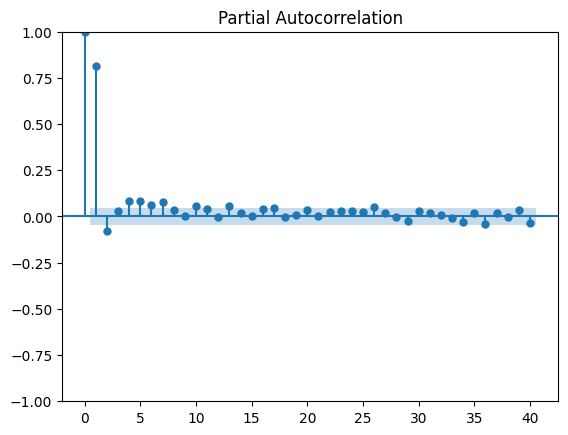

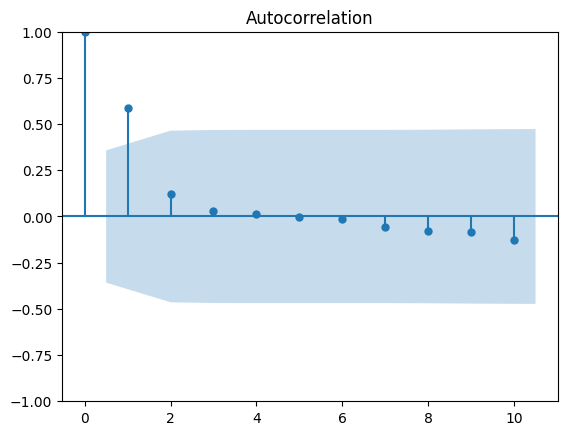

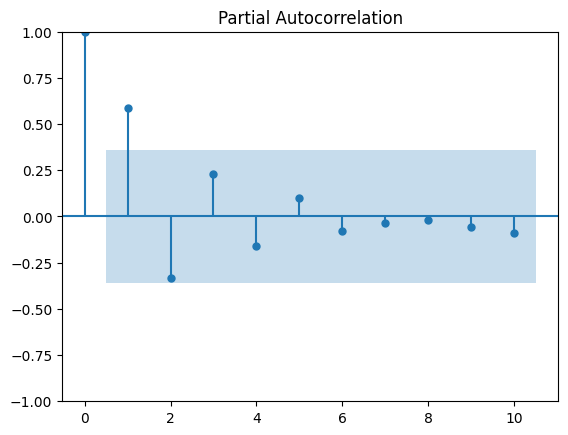

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
   # For training data
plot_acf(train['AvgTemp'], lags=40)
plot_pacf(train['AvgTemp'], lags=40)
plt.show()
   # For test data
plot_acf(test['AvgTemp'], lags=10) # Adjust lags as needed
plot_pacf(test['AvgTemp'], lags=10)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd

train['DATE'] = pd.to_datetime(train['DATE'])  # Convert 'Date' column to datetime objects
train.set_index('DATE', inplace=True)  # Set 'Date' column as index
train = train.asfreq('D')  # Set frequency to daily ('D'). Change if your data has a different frequency

result = seasonal_decompose(train['AvgTemp'], model='additive') # or 'multiplicative'
result.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd

train['Date'] = pd.to_datetime(train['Date'])  # Convert 'Date' column to datetime objects
train.set_index('Date', inplace=True)  # Set 'Date' column as index
train = train.asfreq('D')  # Set frequency to daily ('D'). Change if your data has a different frequency

result = seasonal_decompose(train['AvgTemp'], model='additive') # or 'multiplicative'
result.plot()
plt.show()

KeyError: 'Date'

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['AvgTemp'].mean()
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.000463825206671
